In [1]:
import numpy as np
import torch

# npz 파일을 로드하는 함수
def load_npz_data(npz_file):
    data = np.load(npz_file, allow_pickle=True)
    images = data['images']
    labels = data['labels']  # 필요한 경우 레이블도 사용 가능

    return images, labels

# 예시: AAPL 종목의 20일 기간의 데이터 로드
images, labels = load_npz_data('../data/charts/train_candlestick_data.npz')

/home/indi/anaconda3/envs/imagedpo/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [3]:
images.shape, labels.shape

((3740, 50, 96, 180), (3740, 50))

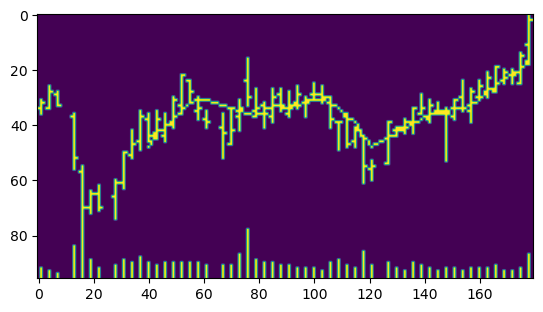

In [7]:
# 이미지 데이터를 그림으로 변환
import matplotlib.pyplot as plt

def plot_candlestick(image):
    fig, ax = plt.subplots()
    ax.imshow(image)
    plt.show()
    
plot_candlestick(images[150][2])

(3740, 50, 96, 180) (1194, 50, 96, 180)
3740 1194
3740 1194


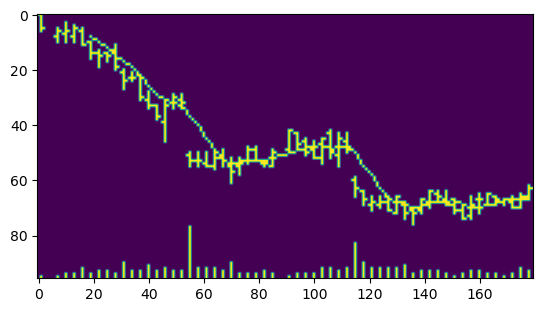

In [14]:
# dataset_img.pkl 불러오기
import pickle
with open('../data/dataset_img.pkl', 'rb') as f:
    train_img_data, test_img_data, times_tr, times_te = pickle.load(f)
    
# Dict, Dict, List, List
print(train_img_data['images'].shape, test_img_data['images'].shape)
print(len(train_img_data['labels']), len(test_img_data['labels']))
print(len(times_tr), len(times_te))


# 예시 이미지 추출
plot_candlestick(train_img_data['images'][0][0])

In [19]:
train_img_data['images'].shape[3]

180

In [21]:
import yfinance as yf

# Download S&P 500 index data
sp500 = yf.download("^GSPC", "2001-01-01", "2024-09-01")
sp500.to_csv("../data/snp500_index.csv")

[*********************100%***********************]  1 of 1 completed
